### Описание задания:

Решить задачу регрессии используя деревья решений. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

### Этапы работы:

1) Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

2) Проведите первичный анализ.
**a.** Проверьте данные на пропуски. Удалите в случае обнаружения.
**b.** Нормализуйте один из признаков.

3) Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

4) Обучите модель регрессии на обучающем множестве.

5) Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

6) Обучите дерево решений на обучающем множестве.
**a.** Повторите п. 5 для полученной модели.
**b.** Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.

7) Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
**a.** Повторите п. 5 для полученной модели.

8) Сформулируйте выводы по проделанной работе.
**a.** Сравните точность двух моделей.
**b.** Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [2]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
houses = fetch_california_housing()

In [4]:
data = pd.DataFrame(houses.data, columns=houses.feature_names)
target = pd.DataFrame(houses.target, columns=houses.target_names)
data = pd.concat([data, target], axis=1)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Пропусков и дубликатов не обнаружено

### Нормализация признаков

In [7]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Принимаем решение нормализовать признак Population

In [8]:
norm = StandardScaler()
population = np.array(data['Population']).reshape(-1,1)
population = norm.fit_transform(population)
population = pd.DataFrame(population)
data['Population'] = population

In [9]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,-0.974429,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,0.861439,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,-0.820777,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,-0.766028,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,-0.759847,2.181467,37.85,-122.25,3.422


### Разбивка данных и обучение модели LinearRegression

In [10]:
X = data[data.columns[:-1]]
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

model = LinearRegression()
model.fit(X_train, y_train)

print(f'score на тестовой множестве модели LinearRegression: {model.score(X_test, y_test)}')

score на тестовой множестве модели LinearRegression: 0.5971316271519005


### Обучение дерева решений на обучающем множестве

In [11]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

print(f'score на тестовой множестве модели DecisionTreeRegressor: {model.score(X_test, y_test)}')

score на тестовой множестве модели DecisionTreeRegressor: 0.6083999694369862


### Визуализация дерева решений

In [12]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

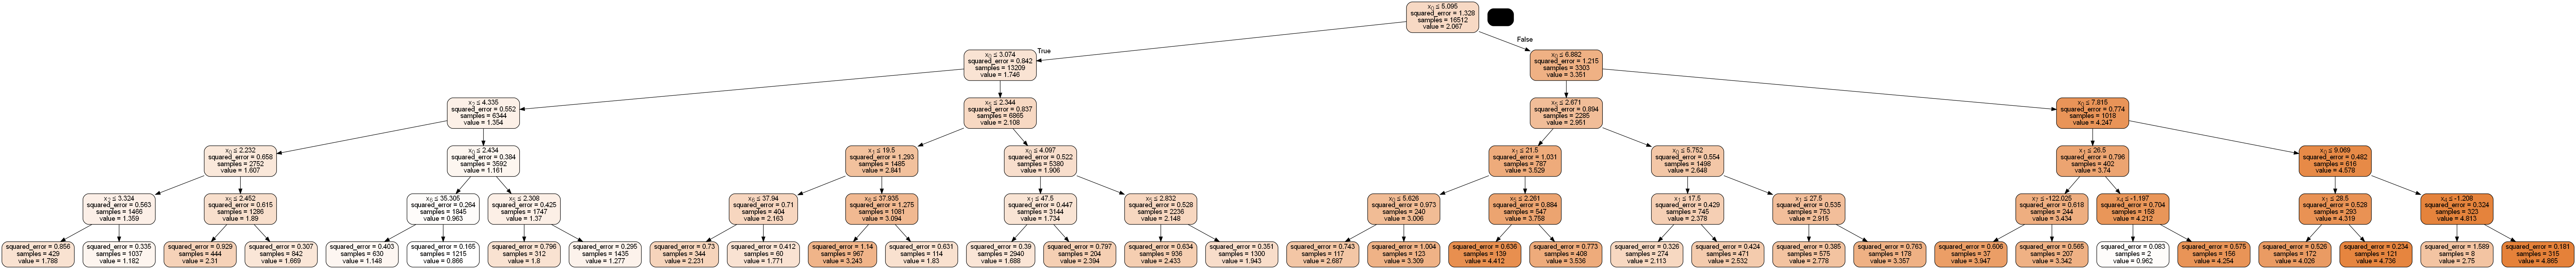

In [13]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
pydot_graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(pydot_graph.create_png())

*Для увеличения картинки необходимо дважды нажать на неё

### Оптимизация параметров дерева решений.

При оптимизации будем находить оптимальную глубину дерева **max_depth** и функцию измерения качества разделения **criterion**

In [14]:
min_deep = 1
max_deep = 12
list_of_criterions = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
crit = []
deep = []
score = []
for i in range(min_deep, max_deep + 1):
    for value in list_of_criterions:
      model = DecisionTreeRegressor(max_depth=i, criterion = value)
      model.fit(X_train, y_train)
      crit.append(value)
      deep.append(i)
      score.append(model.score(X_test, y_test))

In [15]:
data = pd.DataFrame({'deep': deep,  'criterion': crit, 'score': score})
data

,deep,criterion,score
0,1,squared_error,0.306088
1,1,friedman_mse,0.306088
2,1,absolute_error,0.277904
3,1,poisson,0.291438
4,2,squared_error,0.434463
5,2,friedman_mse,0.434463
6,2,absolute_error,0.390540
7,2,poisson,0.429895
8,3,squared_error,0.519245
9,3,friedman_mse,0.519245


**Вывод:** оптимальной глубиной является 9, так как после неё качество модели начинает падать из-за переобучение.
Также на глубинах 5-10 модель лучше работала при использовании критерия poisson

### Обучим модель, использую подобранные на прошлом шаге параметры

In [16]:
model = DecisionTreeRegressor(max_depth=9, criterion = 'poisson')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7092029600381433

### Вывод

Применение метода деревья решений позволило поднять точность модели с 0.5971 до 0.7092 у модели линейной регрессии

Предпочтительней использовать дерево решений для датасетов с небольшим количеством признаков, где есть пропущенные значения и необходима нормализация данных